<a href="https://colab.research.google.com/github/pauladm251/Projetos-Python/blob/main/Case_A%C3%A7ucar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prepara ambiente para upload dos dados.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indicador.xlsx to indicador.xlsx


#**Pacotes**

In [ ]:
import pandas as pd
import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from tensorflow.keras import datasets, layers, models
import random

np.random.seed(123)
tf.random.set_seed(1234)

# **Pré-procsssamento e análise dos dados**

In [ ]:
dados = pd.read_excel('/content/indicador.xlsx')
dados.head()

,data,indicador
0,01/08/2019,58.24
1,02/08/2019,58.51
2,05/08/2019,59.40
3,06/08/2019,59.44
4,07/08/2019,59.75


<AxesSubplot:xlabel='data', ylabel='indicador'>

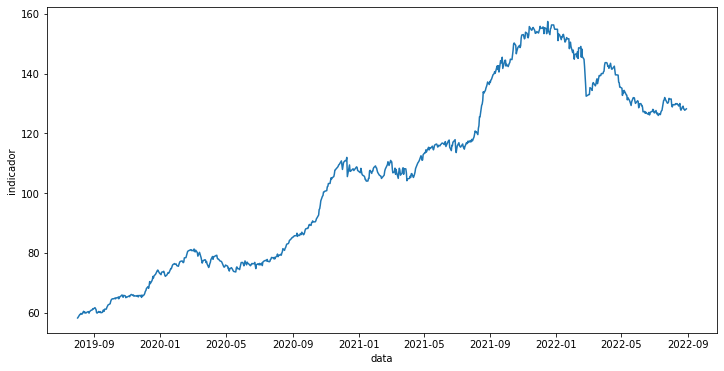

In [ ]:
plt.figure(figsize=(12, 6))
dados["data"] = pd.to_datetime(dados["data"], format = "%d/%m/%Y")
sns.lineplot(data=dados, x="data", y="indicador")

In [ ]:
dados["indicador"].describe()

count    767.000000
mean     106.121239
std       29.671650
min       58.240000
25%       77.065000
50%      108.070000
75%      131.055000
max      157.430000
Name: indicador, dtype: float64

(array([ 90., 130.,  68.,  20.,  72., 114.,  35.,  93.,  68.,  77.]),
 array([ 58.24 ,  68.159,  78.078,  87.997,  97.916, 107.835, 117.754,
        127.673, 137.592, 147.511, 157.43 ]),
 <BarContainer object of 10 artists>)

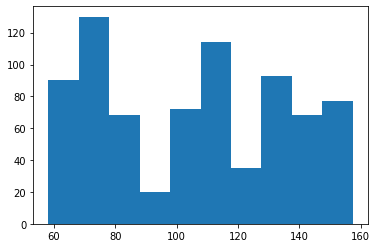

In [ ]:
plt.hist(dados["indicador"])

# **Treinamento, Teste e Target**


In [ ]:
serie = dados["indicador"]

dados["feature_1"] = serie.shift(-2)

dados["feature_2"] = serie.shift(-1)

dados["target"] = serie

dados


,data,indicador,feature_1,feature_2,target
0,2019-08-01,58.24,59.40,58.51,58.24
1,2019-08-02,58.51,59.44,59.40,58.51
2,2019-08-05,59.40,59.75,59.44,59.40
3,2019-08-06,59.44,59.65,59.75,59.44
4,2019-08-07,59.75,59.50,59.65,59.75
...,...,...,...,...,...
762,2022-08-23,129.10,128.08,128.15,129.10
763,2022-08-24,128.15,127.73,128.08,128.15
764,2022-08-25,128.08,128.20,127.73,128.08
765,2022-08-26,127.73,NaN,128.20,127.73


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


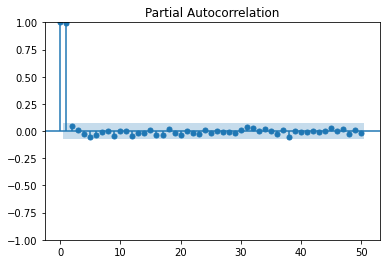

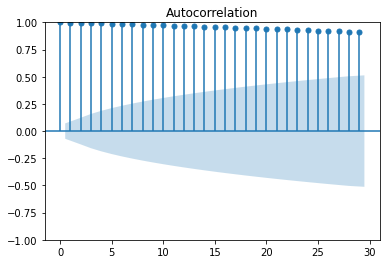

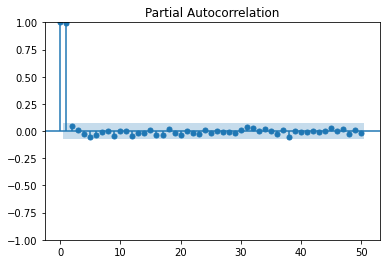

In [ ]:
plot_acf(serie)
plot_pacf(serie, lags=50)

In [ ]:
feature_df = dados.iloc[0:765,2:4]
target_df = dados.iloc[0:765,4]

**Padronizar features e target**

In [ ]:
scalerFeature = MinMaxScaler()
features_scaled = scalerFeature.fit_transform(feature_df)
features_scaled

array([[0.00000000e+00, 0.00000000e+00],
       [4.08038356e-04, 8.99716943e-03],
       [3.57033561e-03, 9.40153660e-03],
       ...,
       [7.00601857e-01, 7.04003235e-01],
       [6.97031521e-01, 7.03295592e-01],
       [7.01825972e-01, 6.99757380e-01]])

In [ ]:
target_df= np.array(target_df)
target_df = target_df.reshape(-1,1)
scalerTarget = MinMaxScaler()
target_scaled = scalerTarget.fit_transform(target_df)

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=0)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [ ]:
x_train.shape

(550, 2)

### Modelo TensorFlow

In [ ]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Dense(2,activation = 'relu'),
  tf.keras.layers.Dense(10,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(15,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

modelo.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [ ]:
history = modelo.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=5, epochs=100)

Epoch 1/100
110/110 [==============================] - 3s 9ms/step - loss: 0.0715 - accuracy: 0.0018 - val_loss: 0.0475 - val_accuracy: 0.0161
Epoch 2/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0203 - accuracy: 0.0018 - val_loss: 0.0051 - val_accuracy: 0.0161
Epoch 3/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 0.0018 - val_loss: 0.0021 - val_accuracy: 0.0161
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 0.0018 - val_loss: 0.0015 - val_accuracy: 0.0161
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.0018 - val_loss: 0.0012 - val_accuracy: 0.0161
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0011 - accuracy: 0.0018 - val_loss: 0.0016 - val_accuracy: 0.0161
Epoch 7/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0161

In [ ]:
x_hat = modelo.predict(X_test)

array([[0.7108447 ],
       [0.16153175],
       [0.14349097],
       [0.08059678],
       [0.23225772],
       [0.14356375],
       [0.2507974 ],
       [0.4617183 ],
       [0.8956452 ],
       [0.5735297 ],
       [0.08227056],
       [0.5653147 ],
       [0.4418938 ],
       [0.700403  ],
       [0.74555415],
       [0.864393  ],
       [0.1790903 ],
       [0.10268024],
       [0.5859537 ],
       [0.44115698],
       [0.44563502],
       [0.5034147 ],
       [0.46508348],
       [0.47481954],
       [0.07994717],
       [0.91022605],
       [0.5694028 ],
       [0.75026375],
       [0.10309582],
       [0.59994173],
       [0.8485303 ],
       [0.5950699 ],
       [0.84060025],
       [0.40651125],
       [0.8478054 ],
       [0.47583282],
       [0.7963785 ],
       [0.17112069],
       [0.18145476],
       [0.09087771],
       [0.7227713 ],
       [0.48073116],
       [0.48397383],
       [0.1458664 ],
       [0.07955675],
       [0.1906627 ],
       [0.4790621 ],
       [0.460

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, x_hat)

0.9874284853798158

In [ ]:
y_test_normal = scalerTarget.inverse_transform(y_test)
x_hat_normal = scalerTarget.inverse_transform(x_hat)

## Gráfico

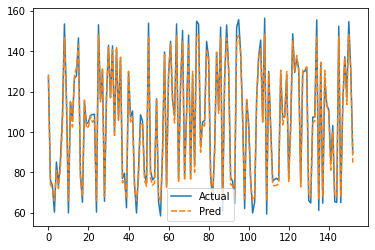

In [ ]:
df_graph = pd.DataFrame()

y_test_series = pd.Series(y_test_normal.flatten())
df_graph['Actual'] = y_test_series

y_pred_series = pd.Series(x_hat_normal.flatten())
df_graph['Pred'] = y_pred_series

sns.lineplot(data=df_graph)

**Overfitting?**

Minimum validation loss: 0.0009426436736248434


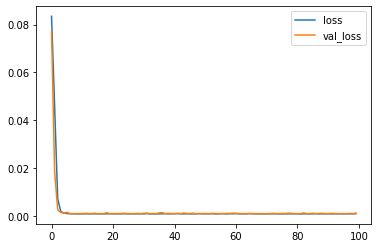

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

**Sazonalidade e Ajuste**

In [ ]:
des_serie = sm.tsa.seasonal_decompose(dados["indicador"],period=365,model="multiplicative")

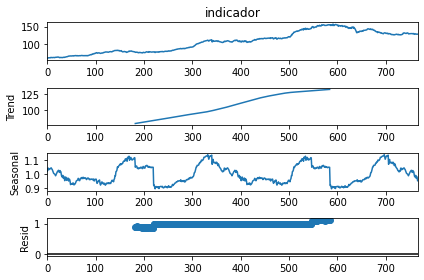

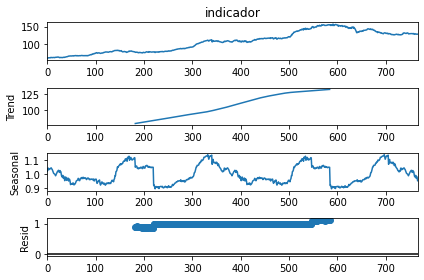

In [ ]:
des_serie.plot()

In [ ]:
serie = dados["indicador"]
serie = serie.diff()

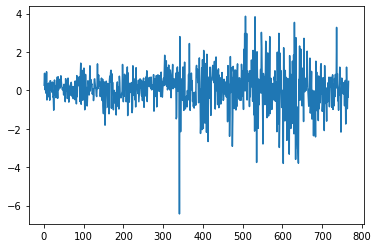

In [ ]:
plt.figure()
plt.plot(serie)